# pytorch 



## 概念理解
####pytorch是命令式的执行
    
    区别于sklearn的对象式的训练只能给数据，pytorch最重要的就是可以高度定制化机器学习内部的那些组件，而且是命令式的，就是给一条命令就是对这个模型进行一个操作
#### 反向传播梯度到底是在算谁
在神经网络中，X反而是定的，因为给定了 训练 的数据，所以变化的是w和b，那实际上是在求W,b的梯度而不断变化，相当于下山的例子中，wb反而是位置值而X是山,然后学习率就是梯度矩阵乘以一个学习率加回到原来的wb矩阵
    正向传播就是在一个初始化的wb中代入X，然后得到一个值，将这个值和真实值进行比较得到损失函数，我们的目标是损失函数最小
    反向传播，就是计算损失函数中w，b的梯度，因为x是不变的，所以wb就是位置，也是变量，而X则成为了常数参数，然后不断计算wb的梯度，将
    得到的wb梯度矩阵乘以一个*学习率*再加回到wb上一个矩阵当中，那就更新了wb，我们就得到了一个新的“位置值”
    又回到正向传播，计算该位置与真实值的距离（及损失函数）如果还是没有达到我们想 要的值的标准，那我就继续反向传播，计算这个wb下的梯度，再加到现在的wb中，得到新的位置

总的来说，w，b才是下山的位置，梯度也是wb的梯度，是wb这个位置下的坡度

In [21]:
#自动求导实现
import torch
#创建一个张量并设置requires_grad=True用来追踪其计算历史
x=torch.arange(4.0)#要求浮点数
x.requires_grad_(True)#这个意思是把关于x的梯度信息保存起来,等价于x=torch.arange(4,requires_grad=True)
#x.grad这个是x的梯度信息，就是上面那个操作之后把梯度信息保存起来了，用。grad就可以调用

y=2*torch.dot(x,x)

y.backward()#反向传播，计算梯度

x.grad#这个是x的梯度信息，就是上面那个操作之后把梯度信息保存起来了，用。grad就可以调用

#梯度累积是指，当我们调用backward函数时，梯度计算的值会自动加到grad属性之中，而不是用新的值进行替换
#这意味着，我们在反向传播之前，需要把梯度清零，否则会影响后面的梯度计算结果
#x.grad.zero_()#清零梯度,如果不清零，梯度会累加变成tensor([ 1.,  5.,  9., 13.])，清零则是tensor1111
y=x.sum()#做个在机器学习中很常用，因为sum之后就是一个标量，标量的梯度就是1，sum的意义是把所有的元素加起来
y.backward()
x.grad




tensor([ 1.,  5.,  9., 13.])

In [23]:
#简洁实现线性回归预测
import torch
from torch import nn
import numpy as np
from torch.utils import data#导入data模块,这个模块提供了有关数据处理的工具，这样我们就不用自己写数据处理的代码了
from d2l import torch as d2l
#set w b
true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=d2l.synthetic_data(true_w,true_b,1000)#生成数据集

def load_array(data_arrays,batch_size,is_train=True):#定义一个函数，用来读取数据集
    dataset=data.TensorDataset(*data_arrays)#把数据和标签组合起来
    return data.DataLoader(dataset,batch_size,shuffle=is_train)#返回一个迭代器,dataloader是d2l里面的函数

In [13]:
#实现线性回归
import torch.nn as nn
import torch.optim as optim
import torch

x = torch.tensor([[1.0, 2], [4, 5], [7, 8]])  # 现在 x 是一个 3x2 的矩阵
y = torch.tensor([[1.0], [2], [3]]) 
w=torch.tensor([[1.0],[2],[3]],requires_grad=True)
b=torch.tensor([[1.0]],requires_grad=True)

class LinearNet(nn.Module):#定义一个类，继承nn.Module
    def __init__(self,num_inputs):
        super().__init__()#调用父类的构造函数
        self.linear=nn.Linear(num_inputs,1)#定义一个线性层，输入是num_inputs，输出是1

    def forward(self,x):#定义前向传播
        y=self.linear(x)
        return y
    
model=LinearNet(2)#实例化一个模型

#loss and optimizer
loss=nn.MSELoss()#均方误差损失函数
optimizer=optim.SGD(model.parameters(),lr=0.03)#定义一个优化器，用随机梯度下降，学习率是0.03
#model.parameters()当你在PyTorch中使用nn.Linear层时，
#PyTorch自动为你创建并管理该层的权重（w）和偏差（b）。你不需要显式定义这些参数；PyTorch通过nn.Linear的实现为你处理了这一切。

#train
num_epochs=3#迭代次数
for epoch in range(1,num_epochs+1):
        l=loss(model(x),y)#计算损失
        optimizer.zero_grad()#梯度清零
        l.backward()#反向传播
        optimizer.step()#更新参数
        print(f'epoch{epoch},loss{l:f}')#打印损失

epoch1,loss30.228279
epoch2,loss148.926544
epoch3,loss733.854492


[1,  300] loss:1.363
Accuracy on test set:86 %
[2,  300] loss:0.307
Accuracy on test set:93 %
[3,  300] loss:0.208
Accuracy on test set:94 %
[4,  300] loss:0.163
Accuracy on test set:95 %
[5,  300] loss:0.140
Accuracy on test set:96 %
[6,  300] loss:0.114
Accuracy on test set:96 %
[7,  300] loss:0.106
Accuracy on test set:97 %
[8,  300] loss:0.098
Accuracy on test set:97 %
[9,  300] loss:0.082
Accuracy on test set:97 %
[10,  300] loss:0.078
Accuracy on test set:97 %


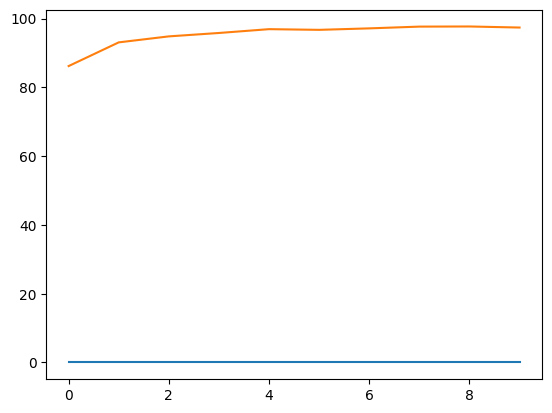

In [8]:
#pytorch构造卷积神经网络
#导入mini-batch数据集
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torch.nn import functional as F
from torch import optim
import matplotlib.pyplot as plt

#定义一个函数，用来读取数据集
batch_size=64  
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])#定义一个转换，把数据转换成tensor，然后归一化
train_dataset=datasets.MNIST(root=r'C:\Users\86136\Desktop\寒假学习\机器学习数据\pytorch',train=True,download=True,transform=transform)#下载训练数据集
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)#读取训练数据集,这个就是把数据集分成一个个batch
test_dataset=datasets.MNIST(root=r'C:\Users\86136\Desktop\寒假学习\机器学习数据\pytorch',train=False,download=True,transform=transform)#下载测试数据集
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)#读取测试数据集


#构造cnn网络
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=torch.nn.Conv2d(1,10,kernel_size=5)
        self.conv2=torch.nn.Conv2d(10,24,kernel_size=5)
        self.conv3=torch.nn.Conv2d(24,20,kernel_size=3)
        self.pooling=torch.nn.MaxPool2d(2)
        self.fc=torch.nn.Linear(20,10)
    
    def forward(self,x):
        batch_size=x.size(0)
        x=F.relu(self.pooling(self.conv1(x)))
        x=F.relu(self.pooling(self.conv2(x)))
        x=F.relu(self.pooling(self.conv3(x)))
        x=x.view(batch_size,-1)
        #print(x.size())
        x=self.fc(x)
        return x
    
model=Net()
criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)

#train
def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target=data
        optimizer.zero_grad()
        
        outputs=model(inputs)
        loss=criterion(outputs,target)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d] loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0
            return running_loss

#test
def test():
    corret=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            outputs=model(images)
            _,predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            corret+=(predicted==labels).sum().item()
    print('Accuracy on test set:%d %%'%(100*corret/total))
    return 100*corret/total

#将每一次epoch的loss可视化
if __name__=='__main__':
    losses=[]
    epoch_list=[]
    Accuracy=[]
    for epoch in range(10):
        epoch_list.append(epoch)
        losses.append(train(epoch))
        Accuracy.append(test())
        
plt.plot(epoch_list,losses)
plt.plot(epoch_list,Accuracy)

#可视化test集上的预测结果

        
        

In [ ]:
#构造Googlenet网络

import torch
from torch.nn import functional as F
from torch.utils.data import dataloader
from torchvision import datasets
from torchvision import transforms
from torch import optim

#dataset loader
transform=transforms.Compose([transforms.ToTensor,transforms.Normalize((0.1307),(0.3081))])
dataloader=

## embeding

embeding在自然语言处理（NLP）中，将词映射到向量空间的过程通常称为"词嵌入"（word embedding），这个过程是一种编码（encoding）手段。在这个过程中，每个唯一的词都会被映射到一个固定大小的高维空间中的向量。

然后一般可以使用已经训练好的embeding的库，比如word2vec，这些就是每个词有一个索引，然后这个索引对应一个训练过的embeding的向量

当然我们可以自己去做这个embeding，但是可能有点问题

然后我们拿到这个embeding的向量我们还可以继续embeding一次再用

使用torch.nn.Embedding(输入维度，embedding维度)构建在一个model的module里面使用

### 训练embedding模型
所以第一步就是给每一个字或词一个初始化的向量，然后训练就是用这个向量来计算上下文的向量（这个是计算后的，和原来初始化的不一定一样，但是可以通过计算知道对应是哪个词）然后这些向量对应的词和真实语料中的统计进行损失判断，然后反向更新权重，最终我们得到一个模型，只要输入初始化的向量就得到一个具有意义的向量，然后这个向量就是我们embedding出来的东西

 是的，您的理解是正确的。Word2Vec训练过程的基本步骤如下：

1. **初始化词嵌入向量**：首先，为词汇表中的每个词分配一个随机初始化的向量。这些向量构成了词嵌入矩阵的初始状态。

2. **构建训练样本**：通过在大量文本数据中滑动窗口，为每个目标词（中心词）生成训练样本。这些样本包括目标词及其上下文词（即在窗口内的其他词）。

3. **预测上下文词**：在训练过程中，模型会尝试预测目标词的上下文词。这涉及到计算目标词的词嵌入向量与上下文词的词嵌入向量之间的相似度（如点积），并使用softmax函数将这些相似度转换为概率。

4. **计算损失**：模型的预测概率与真实上下文词在语料库中出现的概率之间的差异被用来计算损失。这个损失反映了模型预测的准确性。

5. **反向传播和权重更新**：通过反向传播算法，模型会根据损失函数来调整词嵌入向量，以减少预测误差。这个过程涉及到计算损失相对于词嵌入向量的梯度，并更新向量以最小化损失。

6. **迭代训练**：重复上述步骤，通过多次迭代（epochs），模型逐渐学习到能够准确预测上下文词的词嵌入向量。

7. **得到最终词嵌入**：训练完成后，每个词的词嵌入向量反映了其在语义空间中的位置。这些向量可以捕捉词与词之间的相似性和关联性，使得语义上相似的词在向量空间中彼此接近。

最终，Word2Vec模型能够将词汇表中的每个词映射到一个固定长度的向量，这个向量可以用于各种下游任务，如文本分类、情感分析、机器翻译等。这些词嵌入向量是模型学习到的，它们蕴含了丰富的语义信息，使得模型能够理解词汇之间的关系。


20020523
[1,  300] loss:0.807
[2,  300] loss:0.715
[3,  300] loss:0.685
[4,  300] loss:0.672
[5,  300] loss:0.667


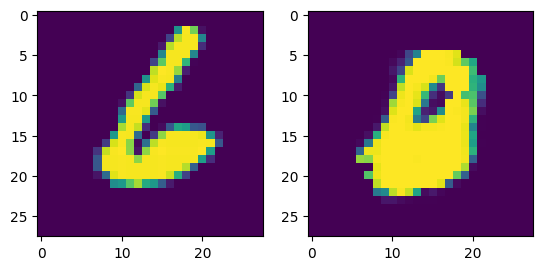

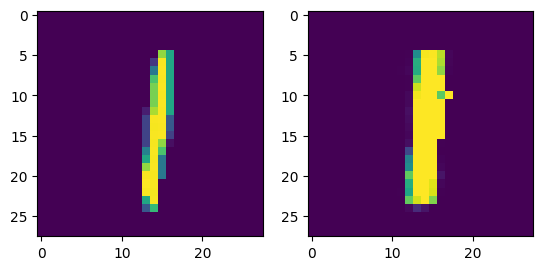

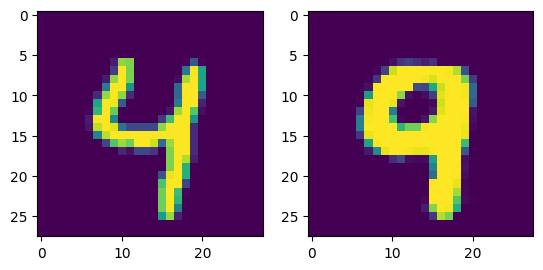

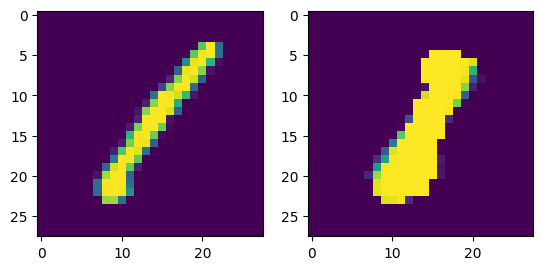

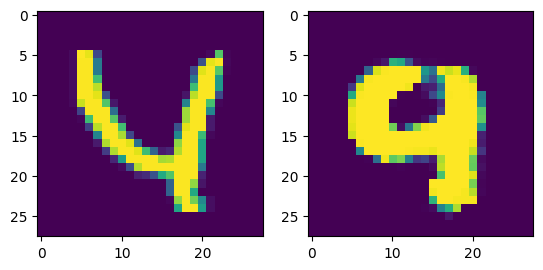

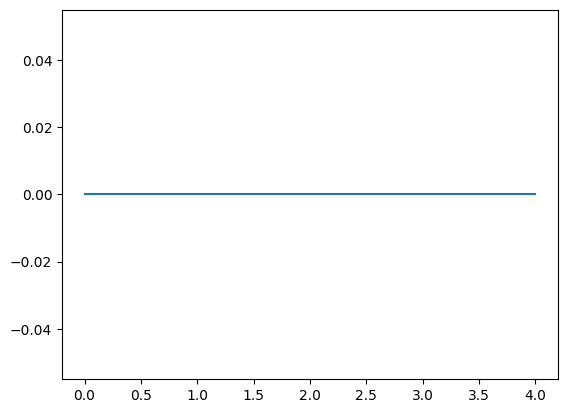

In [4]:
#用minibatch训练一个AE模型

import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch import optim
import matplotlib.pyplot as plt
torch.random.manual_seed(20020523)
print(torch.random.initial_seed())


#构建一个数据集
batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_dataset=datasets.MNIST(root=r'C:\Users\86136\Desktop\寒假学习\机器学习数据\pytorch',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

#构建一个自编码器
class AE(nn.Module):
    def __init__(self):
        super(AE,self).__init__()
        self.encoder=nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3)
        )
        self.decoder=nn.Sequential(
            nn.Linear(3,12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
    def forward(self,x):
        batch_size=x.size(0)
        x=x.view(batch_size,-1)
        x=self.encoder(x)
        x=self.decoder(x)
        x=x.view(batch_size,1,28,28)
        return x
    
model=AE()
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

#train
def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,_=data
        optimizer.zero_grad()
        
        outputs=model(inputs)
        loss=criterion(outputs,inputs)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d] loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0
            return running_loss
#test
def test():
    with torch.no_grad():
        for data in train_loader:
            inputs,_=data
            outputs=model(inputs)
            return inputs,outputs
#将每一次epoch的loss可视化
if __name__=='__main__':
    losses=[]
    epoch_list=[]
    for epoch in range(5):
        epoch_list.append(epoch)
        losses.append(train(epoch))
    inputs,outputs=test()
    plt.figure()
    for i in range(5):
        plt.subplot(1,2,1)
        plt.imshow(inputs[i][0])
        plt.subplot(1,2,2)
        plt.imshow(outputs[i][0])
        plt.show()
    plt.plot(epoch_list,losses)
    




20020523
[1,  300] loss:0.754
[2,  300] loss:0.645
[3,  300] loss:0.617
[4,  300] loss:0.599
[5,  300] loss:0.591


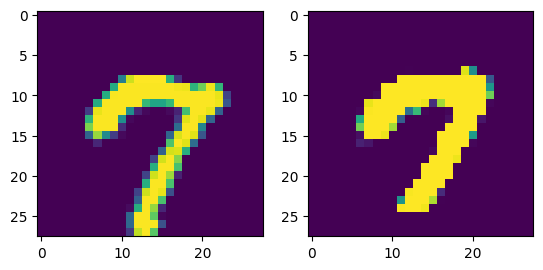

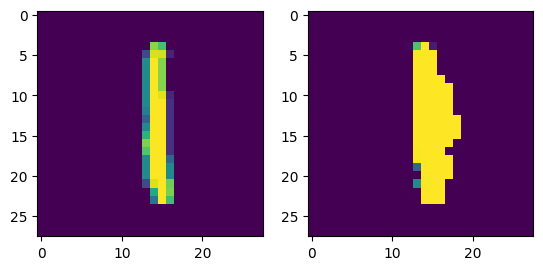

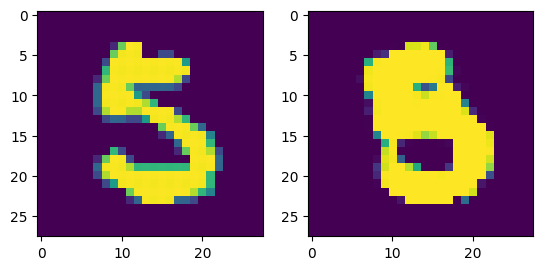

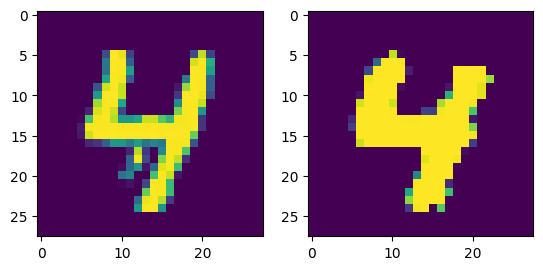

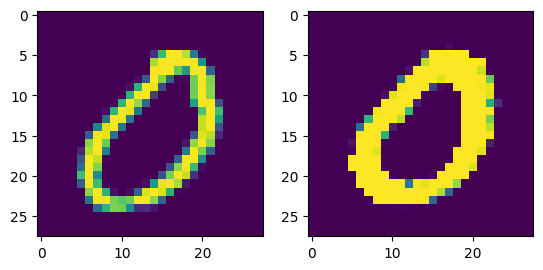

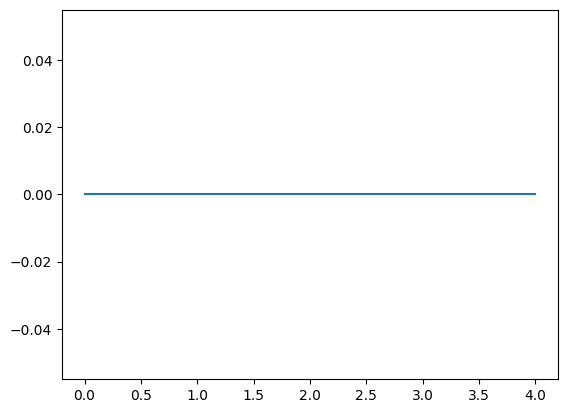

In [7]:
#反向结构

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch import optim
import matplotlib.pyplot as plt
torch.random.manual_seed(20020523)
print(torch.random.initial_seed())

#构建一个数据集
batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_dataset=datasets.MNIST(root=r'C:\Users\86136\Desktop\寒假学习\机器学习数据\pytorch',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

#构建一个自编码器
class AE(nn.Module):
    def __init__(self):
        super(AE,self).__init__()
        self.encoder=nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,512),
            nn.ReLU(),
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Linear(1024,2048)
        )
        self.decoder=nn.Sequential(
            nn.Linear(2048,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
    def forward(self,x):
        batch_size=x.size(0)
        x=x.view(batch_size,-1)
        x=self.encoder(x)
        x=self.decoder(x)
        x=x.view(batch_size,1,28,28)
        return x
    
model=AE()
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

#train
def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,_=data
        optimizer.zero_grad()
        
        outputs=model(inputs)
        loss=criterion(outputs,inputs)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d] loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0
            return running_loss
#test
def test():
    with torch.no_grad():
        for data in train_loader:
            inputs,_=data
            outputs=model(inputs)
            return inputs,outputs
#将每一次epoch的loss可视化
if __name__=='__main__':
    losses=[]
    epoch_list=[]
    for epoch in range(5):
        epoch_list.append(epoch)
        losses.append(train(epoch))
    inputs,outputs=test()
    plt.figure()
    for i in range(5):
        plt.subplot(1,2,1)
        plt.imshow(inputs[i][0])
        plt.subplot(1,2,2)
        plt.imshow(outputs[i][0])
        plt.show()
    plt.plot(epoch_list,losses)
    




20020523
[1,  300] loss:0.844
[2,  300] loss:0.831
[3,  300] loss:0.830
[4,  300] loss:0.747
[5,  300] loss:0.671


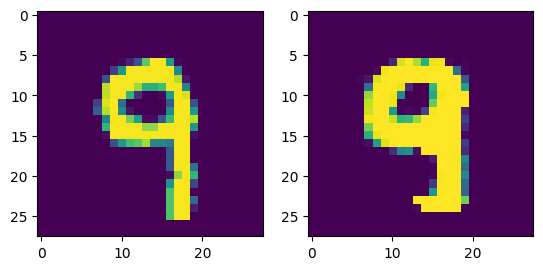

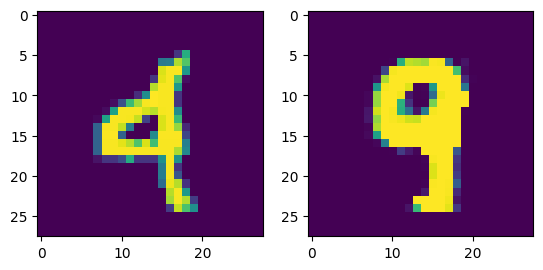

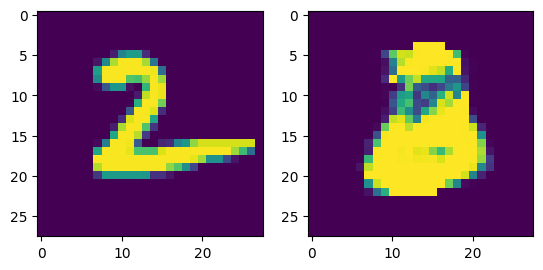

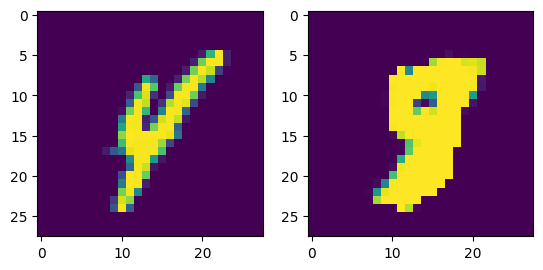

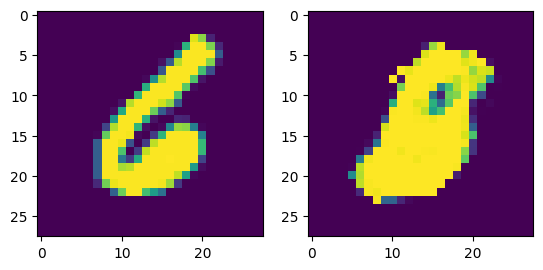

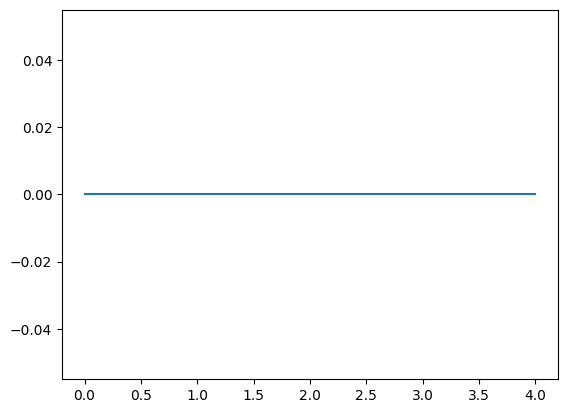

In [6]:
#不变维
#反向结构

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch import optim
import matplotlib.pyplot as plt


torch.random.manual_seed(20020523)
print(torch.random.initial_seed())


#构建一个数据集
batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_dataset=datasets.MNIST(root=r'C:\Users\86136\Desktop\寒假学习\机器学习数据\pytorch',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

#构建一个自编码器
class AE(nn.Module):
    def __init__(self):
        super(AE,self).__init__()
        self.encoder=nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,128)
        )
        self.decoder=nn.Sequential(
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
    def forward(self,x):
        batch_size=x.size(0)
        x=x.view(batch_size,-1)
        x=self.encoder(x)
        x=self.decoder(x)
        x=x.view(batch_size,1,28,28)
        return x
    
model=AE()
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

#train
def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,_=data
        optimizer.zero_grad()
        
        outputs=model(inputs)
        loss=criterion(outputs,inputs)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d] loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0
            return running_loss
#test
def test():
    with torch.no_grad():
        for data in train_loader:
            inputs,_=data
            outputs=model(inputs)
            return inputs,outputs
#将每一次epoch的loss可视化
if __name__=='__main__':
    losses=[]
    epoch_list=[]
    for epoch in range(5):
        epoch_list.append(epoch)
        losses.append(train(epoch))
    inputs,outputs=test()
    plt.figure()
    for i in range(5):
        plt.subplot(1,2,1)
        plt.imshow(inputs[i][0])
        plt.subplot(1,2,2)
        plt.imshow(outputs[i][0])
        plt.show()
    plt.plot(epoch_list,losses)
    




# RNN

变形：LSTM GRU

In [4]:
#写一个RNN网络的例子
import torch
import torch.nn as nn
from torch import optim


#数据准备
idx2char=['h','i','e','l','o']
x_data=[[0,1,0,2,3,3]]#hihell
y_data=[1,0,2,3,3,4]#ihello

inputs=torch.LongTensor(x_data)
labels=torch.LongTensor(y_data)

#构建模型RNN
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        self.emb=torch.nn.Embedding(input_size,embedding_size)
        self.rnn=torch.nn.RNN(input_size=embedding_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True) 
        self.fc=torch.nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        hidden=torch.zeros(num_layers,x.size(0),hidden_size)
        x=self.emb(x)
        x,_=self.rnn(x,hidden)#这里的,_是因为RNN的输出有两个，一个是输出，一个是隐藏层状态
        x = self.fc(x)
        return x.view(-1, num_classes)
    
#LSTM    区别在于有一个细胞状态
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM,self).__init__()
        self.emb=torch.nn.Embedding(input_size,embedding_size)
        #lstm写法 
        self.rnn=torch.nn.LSTM(input_size=embedding_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        #如果是LSTM的话forward里面的hidden要有两个，一个是隐藏层状态，一个是细胞状态
        self.fc=torch.nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        hidden=torch.zeros(num_layers,x.size(0),hidden_size)
        cell=torch.zeros(num_layers,x.size(0),hidden_size)#LSTM的话要有两个hidden,这个是细胞状态
        x=self.emb(x)
        x,_=self.rnn(x,(hidden,cell))#LSTM的话要有两个hidden
        x = self.fc(x)
        return x.view(-1, num_classes)

#GRU
class GRU(nn.Module):
    def __init__(self):
        super(GRU,self).__init__()
        self.emb=torch.nn.Embedding(input_size,embedding_size)
        self.gru=torch.nn.GRU(input_size=embedding_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.fc=torch.nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        hidden=torch.zeros(num_layers,x.size(0),hidden_size)
        x=self.emb(x)
        x,_=self.gru(x,hidden)
        x = self.fc(x)
        return x.view(-1, num_classes)

#定义超参数
input_size=len(idx2char)
hidden_size=len(idx2char)
output_size=len(idx2char)
num_layers=1
embedding_size=10
num_classes=5

#实例化模型
model=GRU()

#定义损失函数和优化器
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.1)

#训练模型
for epoch in range(10):
    outputs=model(inputs)
    optimizer.zero_grad()
    loss=criterion(outputs,labels.view(-1))
    loss.backward()
    optimizer.step()
    
    _,idx=outputs.max(1)
    idx=idx.data.numpy()
    result_str=[idx2char[c] for c in idx.squeeze()]
    print("epoch:%d,loss:%1.3f"%(epoch+1,loss.item()))
    print("Predicted string:",''.join(result_str))
        

epoch:1,loss:1.774
Predicted string: oooiho
epoch:2,loss:1.392
Predicted string: ihiioo
epoch:3,loss:1.179
Predicted string: ihhloo
epoch:4,loss:0.993
Predicted string: ihello
epoch:5,loss:0.821
Predicted string: ehello
epoch:6,loss:0.661
Predicted string: ehello
epoch:7,loss:0.548
Predicted string: ehello
epoch:8,loss:0.465
Predicted string: ehello
epoch:9,loss:0.401
Predicted string: ihello
epoch:10,loss:0.350
Predicted string: ihello


# transformers



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [14]:
#使用transformer写一个翻译器

#数据是一句中文翻译成一句英文

#数据句子准备
x_data=['我喜欢你','我爱你','我恨你','我讨厌你']
y_data=['I like you','I love you','I hate you','I dislike you']

#构建字典
char_set=list(set(''.join(x_data)))#把所有的字都放在一起，然后去重
char_set.append('<SOS>')#这个是开始标志
char_set.append('<EOS>')#这个是结束标志
char_set.append('<PAD>')#这个是填充标志
char2int={c:i for i,c in enumerate(char_set)}#把字典映射成数字，enumerate是把字典映射成数字，数据结构是字典
int2char=dict(enumerate(char_set))#把数字映射成字典
n_class=len(char_set)#字典的长度

#超参数
n_hidden=128 #
n_layers=6  #这是transformer的层数
embedding_dim=128 #这是embedding的维度
n_head=8    #这是多头注意力的头数
n_position=100 #这是位置编码的长度
d_ff=256 #这是前馈神经网络的维度

#数据预处理，预处理就是把句子映射成one-hot编码，然后进行embedding
def make_data(x,y):
    input_batch=[np.eye(n_class)[[char2int[c] for c in x_]] for x_ in x]#这个是把句子映射成one-hot编码，里面的eye是单位矩阵，然后用索引的方式把句子映射成one-hot编码
    output_batch=[np.eye(n_class)[[char2int[c] for c in y_]] for y_ in y]#这个是把句子映射成one-hot编码
    return torch.FloatTensor(input_batch),torch.FloatTensor(output_batch)

#one-hot编码就是比如“我喜欢你”就是[0,1,2,3]“我讨厌你”就是[0,4,5,3]，这个实际是【1,0，0,0】【0,0,1，0】这样的编码



#embedding
class Embedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(Embedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

    def forward(self, x):
        return self.embedding(x)


#positional encoding
class PositionalEncoding(nn.Module):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P
        self.P = torch.zeros((1, max_len, num_hiddens))
        
        
        X = torch.arange(max_len, dtype=torch.float32).reshape(
            -1, 1) / torch.pow(10000, torch.arange(
            0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
            
        #torch.arange(0, num_hiddens, 2, dtype=torch.float32)这一句是做一个0到维度数，两步一格地走，实际就是做了一半的维度，因为后面要变回两倍，一半是sin一半是cos
        self.P[:, :, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)
     

    def forward(self, X):
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        return self.dropout(X)
   
    
# multihead self-attention模块
class FlexibleMultiHeadAttention(nn.Module):
    def __init__(self, emb_size, num_heads):
        super(FlexibleMultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.emb_size = emb_size
        
        # 由于我们会通过最后的线性层调整输出维度，
        # 因此这里不强制要求emb_size必须能被num_heads整除
        self.head_dim = emb_size // num_heads
        
        # 为了简化，我们使用head_dim * num_heads作为中间维度
        self.intermediate_size = self.head_dim * num_heads
        
        self.w_q = nn.Linear(emb_size, self.intermediate_size)
        self.w_k = nn.Linear(emb_size, self.intermediate_size)
        self.w_v = nn.Linear(emb_size, self.intermediate_size)
        
        # 最后的线性层用于调整输出维度回emb_size
        self.fc_out = nn.Linear(self.intermediate_size, emb_size)
        
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        
        # 分割输入以适应多个头
        Q = self.w_q(x).view(batch_size, seq_len, self.num_heads, self.head_dim)#就是把全输入的拆成几个头去×，最后还是要合并回原来那么大的矩阵
        K = self.w_k(x).view(batch_size, seq_len, self.num_heads, self.head_dim)
        V = self.w_v(x).view(batch_size, seq_len, self.num_heads, self.head_dim)
        
        # 调整形状以适应矩阵乘法
        Q = Q.permute(0, 2, 1, 3) # (batch_size, num_heads, seq_len, head_dim)
        K = K.permute(0, 2, 1, 3)#把长度还回去，因为后面要用长度和维度，而不是头数
        V = V.permute(0, 2, 1, 3)
        
        # 计算注意力得分
        scores = torch.matmul(Q, K.transpose(-2, -1)) / self.head_dim ** 0.5
        attention = F.softmax(scores, dim=-1)
        
        # 应用注意力机制到V上
        out = torch.matmul(attention, V) # (batch_size, num_heads, seq_len, head_dim)
        
        # 重新组合头部
        out = out.permute(0, 2, 1, 3).contiguous()
        #.contiguous()方法是用来确保张量在内存中是连续存储的。这通常在执行某些操作后变得必要，特别是在进行.view()、.permute()等
        # 改变张量形状或维度顺序的操作之后。这些操作可能会导致张量在内存中的存储变得不连续，进而影响到后续对张量的处理
        out = out.view(batch_size, seq_len, -1) # (batch_size, seq_len, intermediate_size)
        
        # 通过最后的线性层调整维度
        out = self.fc_out(out)
        
        return out

#add 和 Nomal
class AddNorm(nn.Module):
    def __init__(self,normshape):
        super(AddNorm,self).__init__()
        self.ln=nn.LayerNorm(normshape)
        
    def forward(self,X,Y):
        return self.ln(self.dropout(Y) + X)

class ffn(nn.Module):
    def __init__(self,input_dim,hidden_dim,out_dim):
        super(ffn,self).__init__()
        self.linear1=nn.Linear(input_dim,hidden_dim)
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(hidden_dim,out_dim)
        
    def forward(self,x):
        x=self.linear1(x)
        x=self.relu(x)
        x=self.linear2(x)
        return x
        
    


#mask
class MaskMultiHeadAttention(nn.Module):
    def __init__(self, emb_size, num_heads):
        super(MaskMultiHeadAttention, self).__init__()
        self.emb_size = emb_size
        self.num_heads = num_heads
        self.head_dim = emb_size // num_heads
        
        assert self.head_dim * num_heads == emb_size, "Embedding size must be divisible by number of heads"

        self.intermediate_size = self.head_dim * num_heads
        self.w_q = nn.Linear(emb_size, self.intermediate_size)
        self.w_k = nn.Linear(emb_size, self.intermediate_size)
        self.w_v = nn.Linear(emb_size, self.intermediate_size)
        
        # 最后的线性层用于调整输出维度回emb_size
        self.fc_out = nn.Linear(self.intermediate_size, emb_size)
        
    def forward(self, x, mask=None):
        batch_size, seq_len, _ = x.size()
        
        # 分割输入以适应多个头
        Q = self.w_q(x).view(batch_size, seq_len, self.num_heads, self.head_dim)
        K = self.w_k(x).view(batch_size, seq_len, self.num_heads, self.head_dim)
        V = self.w_v(x).view(batch_size, seq_len, self.num_heads, self.head_dim)

        # 调整形状以适应矩阵乘法
        Q = Q.permute(0, 2, 1, 3)
        K = K.permute(0, 2, 1, 3)
        V = V.permute(0, 2, 1, 3)

        # 计算点积注意力得分
        energy = torch.einsum("bnqhd,bnkhd->bnhqk", [Q, K])
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))
        
        # 应用softmax函数获取注意力权重
        attention = torch.softmax(energy / (self.embed_size ** 0.5), dim=-1)
        
        # 应用注意力权重到V
        out = torch.einsum("bnhqk,bnkhd->bnqhd", [attention, V]).reshape(batch_size, seq_len, self.intermediate_size)
        
        # 通过最后的线性层
        out = self.fc_out(out)
        
        return out

class TransformerEncoderLayer(nn.Module):
    def __init__(self, emb_size, n_heads, ff_hidden_dim, dropout):
        super(TransformerEncoderLayer, self).__init__()
        self.attention = FlexibleMultiHeadAttention(emb_size, n_heads)
        self.norm1 = nn.LayerNorm(emb_size)
        self.norm2 = nn.LayerNorm(emb_size)
        self.ff = ffn(emb_size, ff_hidden_dim, emb_size)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, src, src_mask):
        # Self-attention
        src2 = self.attention(src, src, src, src_mask)
        src = src + self.dropout1(src2)
        src = self.norm1(src)
        # Feed forward
        src2 = self.ff(src)
        src = src + self.dropout2(src2)
        src = self.norm2(src)
        return src

class TransformerDecoderLayer(nn.Module):
    def __init__(self, emb_size, n_heads, ff_hidden_dim, dropout):
        super(TransformerDecoderLayer, self).__init__()
        self.self_attention = MaskMultiHeadAttention(emb_size, n_heads)
        self.norm1 = nn.LayerNorm(emb_size)
        self.norm2 = nn.LayerNorm(emb_size)
        self.norm3 = nn.LayerNorm(emb_size)
        self.ff = ffn(emb_size, ff_hidden_dim, emb_size)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.dropout3 = nn.Dropout(dropout)

    def forward(self, tgt, memory, tgt_mask, memory_mask):
        # Self-attention
        tgt2 = self.self_attention(tgt, tgt_mask)
        tgt = tgt + self.dropout1(tgt2)
        tgt = self.norm1(tgt)
        # Attention with encoder output
        tgt2 = self.self_attention(tgt, memory, memory, memory_mask)
        tgt = tgt + self.dropout2(tgt2)
        tgt = self.norm2(tgt)
        # Feed forward
        tgt2 = self.ff(tgt)
        tgt = tgt + self.dropout3(tgt2)
        tgt = self.norm3(tgt)
        return tgt




NameError: name 'TransformerModel' is not defined

## positional encoding

造一个位置编码，给embedding的每一个位置加个位置信息

In [ ]:

class PositionalEncoding(nn.Module):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P
        self.P = torch.zeros((1, max_len, num_hiddens))
        
        
        X = torch.arange(max_len, dtype=torch.float32).reshape(
            -1, 1) / torch.pow(10000, torch.arange(
            0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
            
        #torch.arange(0, num_hiddens, 2, dtype=torch.float32)这一句是做一个0到维度数，两步一格地走，实际就是做了一半的维度，因为后面要变回两倍，一半是sin一半是cos
        self.P[:, :, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)
     

    def forward(self, X):
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        return self.dropout(X)

In [8]:

#torch矩阵运算，在positional encoding那里的计算
d=10

a=torch.arange(3, dtype=torch.float32).reshape(-1, 1) #3是序列长度，pos
b=torch.arange(0, 10, 2, dtype=torch.float32)#10是维度，就是embeding维度
c=torch.pow(10000,b/10)#幂运算，10000为底数
X=a/c


print(a)
print(b)
print(c)
print(X)#


tensor([[0.],
        [1.],
        [2.]])
tensor([0., 2., 4., 6., 8.])
tensor([1.0000e+00, 6.3096e+00, 3.9811e+01, 2.5119e+02, 1.5849e+03])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.5849e-01, 2.5119e-02, 3.9811e-03, 6.3096e-04],
        [2.0000e+00, 3.1698e-01, 5.0238e-02, 7.9621e-03, 1.2619e-03]])



### 注意力机制中的点积

在自注意力机制中，我们通常有查询（Query, Q）、键（Key, K）和值（Value, V）三个矩阵。这些矩阵通过对输入序列的不同线性变换获得。点积注意力计算涉及到Q矩阵和K矩阵的点积，目的是为了计算序列中每个元素对于其它元素的注意力权重。

- 假设Q和K的维度分别是 \((\text{seq\_len}, \text{d\_k})\)，其中 \(\text{seq\_len}\) 是序列长度，\(\text{d\_k}\) 是键/查询向量的维度。
- 计算Q和K的点积后，我们得到一个 \((\text{seq\_len}, \text{seq\_len})\) 的注意力得分矩阵，其中每个元素 \(a_{ij}\) 表示序列中第i个元素对第j个元素的注意力权重。

### 处理不一致的维度

在注意力机制中，我们不需要担心点积结果的维度与输入矩阵的大小不一致，因为这里的目的是生成一个注意力图（即，每个元素对其他元素的关注程度），而不是直接输出一个与输入大小相同的矩阵。生成的注意力图（权重矩阵）接下来会用于加权值（Value, V）矩阵，以生成加权后的输出，这个过程可以概括为以下几个步骤：

1. **计算注意力得分**：通过Q和K的点积得到一个 \((\text{seq\_len}, \text{seq\_len})\) 的矩阵，表示注意力权重。
2. **应用Softmax**：对每一行应用softmax函数，使得每一行的元素和为1，这样每个元素的注意力权重都在0到1之间，表示概率。
3. **加权V矩阵**：使用上一步得到的注意力权重矩阵与V矩阵相乘，得到加权后的输出。这一步的结果矩阵将与V矩阵的维度相同，即 \((\text{seq\_len}, \text{d\_v})\)，其中 \(\text{d\_v}\) 是值向量的维度。


Q(N*M)
K(N*M)

A=Q*K^T=(N*N)

V(N*M)

B=A'(N*N)*V(N*M)=(N*M)




In [7]:
import torch
import torch.nn.functional as F

class Selfattention(torch.nn.Module):
    def __init__(self,embsize):
        super(Selfattention,self).__init__()
        self.embsize=embsize
        self.w_q=torch.nn.Linear(embsize,embsize)
        self.w_k=torch.nn.Linear(embsize,embsize)
        self.w_v=torch.nn.Linear(embsize,embsize)
        
    def forward(self,x):
        #查询kq
        Q=self.w_q(x)
        K=self.w_k(x)
        V=self.w_v(x)
        
        #score
        score=torch.matmul(Q,K.transpose(-2, -1))
        weight=F.softmax(score,dim=-1)
        
        output=torch.matmul(weight,V)      
        return output

batch_size = 1
seq_len = 3
embsize = 4

# 创建一个示例输入张量
x = torch.randn(batch_size, seq_len, embsize)

# 实例化 SelfAttention 模块并应用于输入张量
self_attention = Selfattention(embsize)
attention_output = self_attention(x)

print("输入张量:", x)
print("注意力机制的输出:", attention_output)

输入张量: tensor([[[-0.3060,  0.1109, -0.8084, -0.9240],
         [-0.9147,  0.2010, -1.4022, -0.7349],
         [-0.4991, -0.3574, -0.0453, -0.8521]]])
注意力机制的输出: tensor([[[0.1112, 0.3053, 0.3564, 0.5854],
         [0.1254, 0.2984, 0.3358, 0.5897],
         [0.1071, 0.3076, 0.3623, 0.5848]]], grad_fn=<UnsafeViewBackward0>)


#### 多头注意力

在多头注意力机制中，每个头确实只处理输入数据的一部分信息，但这种“部分”是通过将输入数据的特征维度分割成多个子集来实现的，而不是通过选择输入数据的子集。具体来说，每个头都会对输入的全体数据进行操作，但它们各自关注于输入特征的不同“视角”或子空间。



假设我们有一个简化的场景，其中输入数据是一个句子经过嵌入处理后的矩阵，句子包含3个单词，每个单词的嵌入维度是4。因此，我们的输入矩阵`X`的维度是`[3, 4]`（假设没有批处理维度）：

```
X = [[1, 2, 3, 4],
     [5, 6, 7, 8],
     [9, 10, 11, 12]]
```

现在，我们想要应用一个包含2个头的多头注意力机制。为了简化，我们假设每个头直接处理整个嵌入维度，然后我们将嵌入维度分割为2个子集来模拟每个头关注的不同特征子集。这里，我们将嵌入维度分成两半，每个头处理两个特征。

- 头1关注前两个特征：`[1, 2]`，`[5, 6]`，`[9, 10]`
- 头2关注后两个特征：`[3, 4]`，`[7, 8]`，`[11, 12]`

在实际的多头注意力实现中，这种“关注”是通过对输入矩阵`X`应用不同的线性变换（即通过不同的权重矩阵）实现的，而不是直接选择子集。每个头通过自己的权重矩阵产生新的查询（Q）、键（K）和值（V）矩阵，这可以看作是对输入数据的不同“视角”或子空间的编码。

```python
# 假设权重矩阵为简单的分割操作
W_q1, W_k1, W_v1 = [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0]  # 头1的权重
W_q2, W_k2, W_v2 = [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0]  # 头2的权重

# 每个头处理全体数据，但通过不同的权重关注不同的子集
Q1, K1, V1 = X @ W_q1, X @ W_k1, X @ W_v1  # 头1
Q2, K2, V2 = X @ W_q2, X @ W_k2, X @ W_v2  # 头2

# 然后，每个头独立计算注意力得分和输出
# 注意力得分是通过Q和K的点积计算的，输出是通过加权的V计算的

# 最终，所有头的输出可以被合并（例如，通过拼接）并通过另一个线性变换
```

这个例子简化了实际的多头注意力机制的计算过程，但重点是展示每个头如何通过关注输入数据的不同特征子集（即不同的“视角”或子空间），以独立且并行的方式处理整个输入数据。最终，通过合并所有头的输出，模型可以获得一个综合了多种特征视角的丰富表示。

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttention(nn.Module):
    def __init__(self, emb_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.emb_size = emb_size
        
        # 由于我们会通过最后的线性层调整输出维度，
        # 因此这里不强制要求emb_size必须能被num_heads整除
        self.head_dim = emb_size // num_heads
        
        # 为了简化，我们使用head_dim * num_heads作为中间维度
        self.intermediate_size = self.head_dim * num_heads
        
        self.w_q = nn.Linear(emb_size, self.intermediate_size)
        self.w_k = nn.Linear(emb_size, self.intermediate_size)
        self.w_v = nn.Linear(emb_size, self.intermediate_size)
        
        # 最后的线性层用于调整输出维度回emb_size
        self.fc_out = nn.Linear(self.intermediate_size, emb_size)
        
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        
        # 分割输入以适应多个头
        Q = self.w_q(x).view(batch_size, seq_len, self.num_heads, self.head_dim)#就是把全输入的拆成几个头去×，最后还是要合并回原来那么大的矩阵
        K = self.w_k(x).view(batch_size, seq_len, self.num_heads, self.head_dim)
        V = self.w_v(x).view(batch_size, seq_len, self.num_heads, self.head_dim)
        
        # 调整形状以适应矩阵乘法
        Q = Q.permute(0, 2, 1, 3) # (batch_size, num_heads, seq_len, head_dim)
        K = K.permute(0, 2, 1, 3)#把长度还回去，因为后面要用长度和维度，而不是头数
        V = V.permute(0, 2, 1, 3)
        
        # 计算注意力得分
        scores = torch.matmul(Q, K.transpose(-2, -1)) / self.head_dim ** 0.5
        attention = F.softmax(scores, dim=-1)
        
        # 应用注意力机制到V上
        out = torch.matmul(attention, V) # (batch_size, num_heads, seq_len, head_dim)
        
        # 重新组合头部
        out = out.permute(0, 2, 1, 3).contiguous()
        #.contiguous()方法是用来确保张量在内存中是连续存储的。这通常在执行某些操作后变得必要，特别是在进行.view()、.permute()等
        # 改变张量形状或维度顺序的操作之后。这些操作可能会导致张量在内存中的存储变得不连续，进而影响到后续对张量的处理
        out = out.view(batch_size, seq_len, -1) # (batch_size, seq_len, intermediate_size)
        
        # 通过最后的线性层调整维度
        out = self.fc_out(out)
        
        return out

# 示例参数
batch_size = 2
seq_len = 5
emb_size = 128
num_heads = 3  # 不需要emb_size能被num_heads整除

x = torch.randn(batch_size, seq_len, emb_size)

# 实例化并应用模型
model =MultiHeadAttention(emb_size, num_heads)
attention_output = model(x)

print("输入张量的形状:", x.shape)
print("多头注意力机制的输出形状:", attention_output.shape)


输入张量: torch.Size([1, 3, 10])
注意力机制的输出: torch.Size([1, 3, 10])


In [10]:
#点积那部分的计算
a=torch.tensor([[1,2,3],[4,5,6]])
print(a)
b=torch.tensor([[8,9,10],[11,12,13]])
d=b.transpose(-2,-1)
print(d)
c=torch.matmul(a,d)
print(c)

d=torch.matmul(a,b.transpose(-2,-1))

#在PyTorch中使用torch.matmul()进行高维矩阵（张量）乘法时，这个操作会自动应用到输入张量的最后两个维度，而保持其他维度不变。
#这意味着，如果你有两个高维张量参与运算，torch.matmul()将对这两个张量的最后两维执行标准的矩阵乘法，而其他维度则被视为批次维度或广播维度。

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[ 8, 11],
        [ 9, 12],
        [10, 13]])
tensor([[ 56,  74],
        [137, 182]])


In [12]:
#一个更强大的张量计算方法

Q = torch.rand(2, 4, 10, 64)  # 假设(batch_size=2, num_heads=4, seq_length=10, depth=64)
K = torch.rand(2, 4, 10, 64)  # 同上

# 使用einsum计算点积注意力得分
attention_scores = torch.einsum('bnqd,bnkd->bnqk', [Q, K])#这个就可以自动变成我要的那个矩阵了，是自动做转置并相乘的


print(attention_scores.shape)  # 输出：torch.Size([2, 4, 10, 10])


test1=torch.einsum('abcd,abed->abce',[Q,K]) #自己定就行，极其方便，abcd什么符号都行

print(test1.shape)



test2=torch.einsum('abcd,abed-> abed',[Q,K]) #自己定就行，极其方便，abcd什么符号都行

print(test2.shape)

T = torch.rand(2, 3, 4)  # 一个随机的三维张量

# 对最后两维进行求和，只留下第一维
result = torch.einsum('ijk->i', [T])
print(result)


torch.Size([2, 4, 10, 10])
torch.Size([2, 4, 10, 10])
torch.Size([2, 4, 4, 64])
tensor([6.3617, 7.5496])


In [18]:
#数据结构重构

import torch

# 创建一个形状为[2, 3, 4]的张量
x = torch.randn(2, 3, 4)

# 使用.permute()交换维度
y = x.permute(0, 2, 1)

print("原始形状:", x.shape)
print("原始形状:", x)
print("使用.permute()后的形状:", y.shape)
print("使用.permute()后的形状:", y)

z = x.view(6, 4)

print("使用.view()后的形状:", z.shape)
print("使用.view()后的形状:", z)

#.permute()操作在某种程度上类似于高维数据的转置，
# 但它比二维转置更加灵活和强大。在二维矩阵的情况下，转置操作会交换行和列，这是一种特殊情况的维度重新排列。.permute()

原始形状: torch.Size([2, 3, 4])
原始形状: tensor([[[ 0.2341, -0.0973, -0.5326,  1.2378],
         [ 0.7229, -0.1526,  0.6249,  0.7938],
         [ 0.6007,  0.7070,  1.7058, -0.3977]],

        [[ 0.0686, -0.9364,  0.8466, -1.2089],
         [ 0.2993, -2.2419,  0.1185, -0.5211],
         [-0.5724, -1.9823,  0.6665, -0.6854]]])
使用.permute()后的形状: torch.Size([2, 4, 3])
使用.permute()后的形状: tensor([[[ 0.2341,  0.7229,  0.6007],
         [-0.0973, -0.1526,  0.7070],
         [-0.5326,  0.6249,  1.7058],
         [ 1.2378,  0.7938, -0.3977]],

        [[ 0.0686,  0.2993, -0.5724],
         [-0.9364, -2.2419, -1.9823],
         [ 0.8466,  0.1185,  0.6665],
         [-1.2089, -0.5211, -0.6854]]])
使用.view()后的形状: torch.Size([6, 4])
使用.view()后的形状: tensor([[ 0.2341, -0.0973, -0.5326,  1.2378],
        [ 0.7229, -0.1526,  0.6249,  0.7938],
        [ 0.6007,  0.7070,  1.7058, -0.3977],
        [ 0.0686, -0.9364,  0.8466, -1.2089],
        [ 0.2993, -2.2419,  0.1185, -0.5211],
        [-0.5724, -1.9823,  0.6665,

### 残差网络和标准化



In [ ]:
#残差网络和标准化

class AddNorm(nn.Module):
    def __init__(self,normshape):
        super(AddNorm,self).__init__()
        self.ln=nn.LayerNorm(normshape)
        
    def forward(self,X,Y):
        return self.ln(self.dropout(Y) + X)

### FFN

两个线性层，中间一个relu

In [ ]:

class ffn(nn.Module):
    def __init__(self,input_dim,hidden_dim,out_dim):
        super(ffn,self).__init__()
        self.linear1=nn.Linear(input_dim,hidden_dim)
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(hidden_dim,out_dim)
        
    def forward(self,x):
        x=self.linear1(x)
        x=self.relu(x)
        x=self.linear2(x)
        return x
        

### mask multiheadsattention

加一个上三角掩码矩阵到score的

class

# 训练技巧


batch normalization：
    就是把数据或者训练得到的下一层的z进行标准化，就是把数据压到一个一个均值为0，方差为1的空间，那样训练的时候步长对计算的影响就小了，
    但是样本太大，元数据的均值是未知的，方差也未知，那就取样算均值

### 正则表达式换变量名

In [18]:
import re

# 待替换的代码段
code = """
class Decoder(nn.Module):
    def __init__(self, vocab_size, emb_size, num_heads, hidden_dim, num_layers, dropout_prob=0.1):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.pos_encoding = PositionalEncoding(emb_size)
        self.layers = nn.ModuleList([DecoderLayer(emb_size, num_heads, hidden_dim, dropout_prob) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x, encoder_output, src_mask, tgt_mask):
        src_mask = (inputs != y_char2int['<PAD>']).unsqueeze(-2)
        tgt_mask = torch.tril(torch.ones(x.size(1), x.size(1))).bool()
        x = self.embedding(x)
        x = self.pos_encoding(x)
        x = self.dropout(x)
        for layer in self.layers:
            x = layer(x, encoder_output, src_mask, tgt_mask)
        return x

"""


# 定义替换函数
def replace_emb_size(match):
    return "embedding_dim"

# 使用正则表达式替换所有变量名
new_code = re.sub(r'\bemb_size\b', replace_emb_size, code)


# 打印替换后的代码
print(new_code)



class Decoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_heads, hidden_dim, num_layers, dropout_prob=0.1):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.pos_encoding = PositionalEncoding(embedding_dim)
        self.layers = nn.ModuleList([DecoderLayer(embedding_dim, num_heads, hidden_dim, dropout_prob) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x, encoder_output, src_mask, tgt_mask):
        src_mask = (inputs != y_char2int['<PAD>']).unsqueeze(-2)
        tgt_mask = torch.tril(torch.ones(x.size(1), x.size(1))).bool()
        x = self.embedding(x)
        x = self.pos_encoding(x)
        x = self.dropout(x)
        for layer in self.layers:
            x = layer(x, encoder_output, src_mask, tgt_mask)
        return x


